# Tasks 
The first section contains a detail explanation of each of the weekly tasks requested as part of the course

## Task 1: Create a directory structure
Within VS code. I create a new terminal, and select Git Bash instead of powershell (default). I create a new folder within my `CI_gfmg` repository called `data` by doing in Bash: 

```bash
mkdir data
```
I then change my current directory to the new `data` folder by doing in bash: 
```bash
cd data
```
Within this folder, I now create two new folders by: 
```bash
mkdir timestamps
mkdir weather
```

## Task 2: Timestamps
I first change my current directory to the recently created timestamps folder by: 
```bash
cd ./data/timestamps 
```
I now append the current date to a new `.txt` file by doing:
```bash
date >> now.txt
```
I repeated the above command 10 times, and then I read the `now.txt` file by doing:
```bash
cat now.txt
```
For some reason, within VS code using Bash (not codespace) there are some commands noy available. For instance `more` or `man`. 

## Task 3: Formatting Timestamps
Using the terminal GitBash within VS code, I typed the following: 
```bash
date +'%Y%m%d_%H%M%S' >> formatted.txt 
```
I have also tested how to use it within GitHub CodeSpace. 

## Task 4: Create Timestamped Files
To create a `.txt` file with the current date and time in the format `YYYmmdd_HHMMSS` I used in bash the following: 
```bash
touch date +"%Y%m%d_%H%M%S.txt"
```

## Task 5: Download Today's Weather Data
I already mentioned that, working in bash from VS code, there was a couple of bash functions that were not available including `more` or `man`. I found out that I can run Codespaces from my desktop using a VS Code extension. I found the information to do so here: https://code.visualstudio.com/docs/sourcecontrol/intro-to-git

I could also run it from GitHub directly, but I prefer to do it from my desktop. Within CodeSpace I now run: 
```bash
wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today 
```
The `-O` options allows to save the data within the URL with the name `weather.json`

## Task 6: Timestamp the Data
For this task, we literally combine the commands that we developed in Task 5 and Task 4: 
```bash
wget -O `date +"%Y%m%d_%H%M%S.json"` https://prodapi.metweb.ie/observations/athenry/today 
```

## Task 7: Write the Script
For Task 7, I first create a `weather.sh` file by: 
```bash
touch weather.sh 
```
Once, the empty file is created, I write the following within the `.sh` file:
```bash
#! /bin/bash
wget -O data/weather/`date +"%Y%m%d_%H%M%S.json"` https://prodapi.metweb.ie/observations/athenry/today 
```
The first line of code (called the shebang), defines how this particular script should be run. In this case, it identifies that this particular script should be run as a `bash` command environment. 

The second line, is literally a copy of th command developed in Task 5 (which downloads the weather data for the Athenry station, and saves it with the timestamp of the download date/Time). The only change we have done is hat we have included the directory of where to save the file by adding `data/weather/`, before the name of the file. 

However, when we try to run the `weather.sh` file as a command within the bash terminal, we are answered with a Permission Denied message. To solve this issue we need to: 
```bash
chmod u+x ./weather.sh
```
By doing so, we have made this file executable within the bash terminal. To make this file more informative about how the downloading process is being carried, we can include comments about the downloading process within the `.sh` file using the `echo` command. Finally, we can run this within bash as (making sure we are in the correct directory): 
```bash
./weather.sh
```

## Task 8: Notebook
The task 8 involves creating a notebook called `weather.ipynb` and describing the tasks requested. This is the notebook

## Task 9: pandas 
Use the `pandas` function `read_json()` to load in any one of the weather data files you have downloaded with your script.

### Loading the json files 

In [1]:
# Loading libraries
import pandas as pd
import os, json 
import datetime as dt
import matplotlib.pyplot as plt 

# Loading all json files within the data folder. Idea from: https://stackoverflow.com/questions/30539679/python-read-several-json-files-from-a-folder 
path_to_json = './data/weather'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files)

# Initialize a list to store all data
data_list = []

# The following look I modified it slightly using the pd.read_json() function rather than the json.load() function originally used
# in the link above. 
for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        #json_text = json.load(json_file)
        tmp = pd.read_json(json_file,convert_dates=False) #Load each of the json files listed in json_files
                                                           # I had to add the convert_dates=False parameter as the data was not being read correctly in some files  

        data_list.append(tmp) # Append each json file in a list

wdata = pd.concat(data_list, ignore_index=True) # Concatenate all json files into a single dataframe. Columns must match! As we are downloading the data
                                                # from a website, I expect the format to be consistent.        

['20241106_140820.json', '20241110_123739.json', '20241127_151012.json', '20241128_125245.json', '20241202_110404.json', '20241203_113536.json', '20241204_102658.json', 'weather.json']


### Summary and brief analysis of the data 
The loaded data has a total of 59 rows and 15 columns (`wdata.shape`). The information contained in the columns includes the date and time in which the data was reported (`dayname`,`date`,`reportTime`), where the data belongs to (`name`; the location: **Athenry**), and the remaining columns provide information about different weather aspects: 

- Wind: `windspeed` (in kt), `windgust`, `cardinalWindDirection` (N,S,E,W), `Winddirection` (numeric 0-360 degrees)
- Humidity: `humidity` as a % 
- Rainfall: `rainfall` in mm
- Pressure: `pressure` in mbar
- Temperature: `temperature` in <sup>o</sup>C
- Description of the Weather: `weatherDescription`, `text` (both seem to contain the same information)

In [2]:
wdata.shape

(106, 15)

In [3]:
wdata.head()

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,14,04n,Cloudy,"""Cloudy""",4,-,S,180,93,0.0,1021,Wednesday,06-11-2024,00:00
1,Athenry,14,04n,Cloudy,"""Cloudy""",11,-,S,180,92,0.0,1021,Wednesday,06-11-2024,01:00
2,Athenry,14,04n,Cloudy,"""Cloudy""",6,-,S,180,91,0.0,1021,Wednesday,06-11-2024,02:00
3,Athenry,14,04n,Cloudy,"""Cloudy""",7,-,S,180,91,0.0,1021,Wednesday,06-11-2024,03:00
4,Athenry,15,04n,Cloudy,"""Cloudy""",7,-,S,180,92,0.0,1022,Wednesday,06-11-2024,04:00


Although we have downloaded data for just a few days, we can plot the trends in some of the weather information. First we have to create a timestamp (date and time) column, so to plot the data appropriately. 

In [4]:
# Create a timestamp column: 
# I originally tried the options discussed in: 
# https://stackoverflow.com/questions/10624937/convert-datetime-object-to-a-string-of-date-only-in-python
# But I later used chatGPT for the last touch. 
# Basically I add together the date column after converting it to a string to the reportTime column, and then convert all of it to datetime.
wdata['timestamp'] = pd.to_datetime(wdata['date'] + ' ' + wdata['reportTime'],format='%d-%m-%Y %H:%M')

In [5]:
# Setting the TimeStamp as the index for plotting: 
wdata.set_index('timestamp',inplace=True)
wdata.sort_index(inplace=True)

In [6]:
wdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106 entries, 2024-11-04 00:00:00 to 2024-12-04 10:00:00
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   106 non-null    object 
 1   temperature            106 non-null    int64  
 2   symbol                 106 non-null    object 
 3   weatherDescription     106 non-null    object 
 4   text                   106 non-null    object 
 5   windSpeed              106 non-null    object 
 6   windGust               106 non-null    object 
 7   cardinalWindDirection  106 non-null    object 
 8   windDirection          106 non-null    int64  
 9   humidity               106 non-null    int64  
 10  rainfall               106 non-null    float64
 11  pressure               106 non-null    int64  
 12  dayName                106 non-null    object 
 13  date                   106 non-null    object 
 14  reportTime           

In [7]:
dcolumns = ["temperature","windSpeed","humidity","rainfall","pressure"] # Columns of interest  

#Making sure they all are numeric
wdata[dcolumns] = wdata[dcolumns].apply(pd.to_numeric, errors='coerce')

In [8]:
# Some NA values? 
na_windSpeed = wdata[dcolumns].isna().sum()
na_windSpeed

temperature    0
windSpeed      2
humidity       0
rainfall       0
pressure       0
dtype: int64

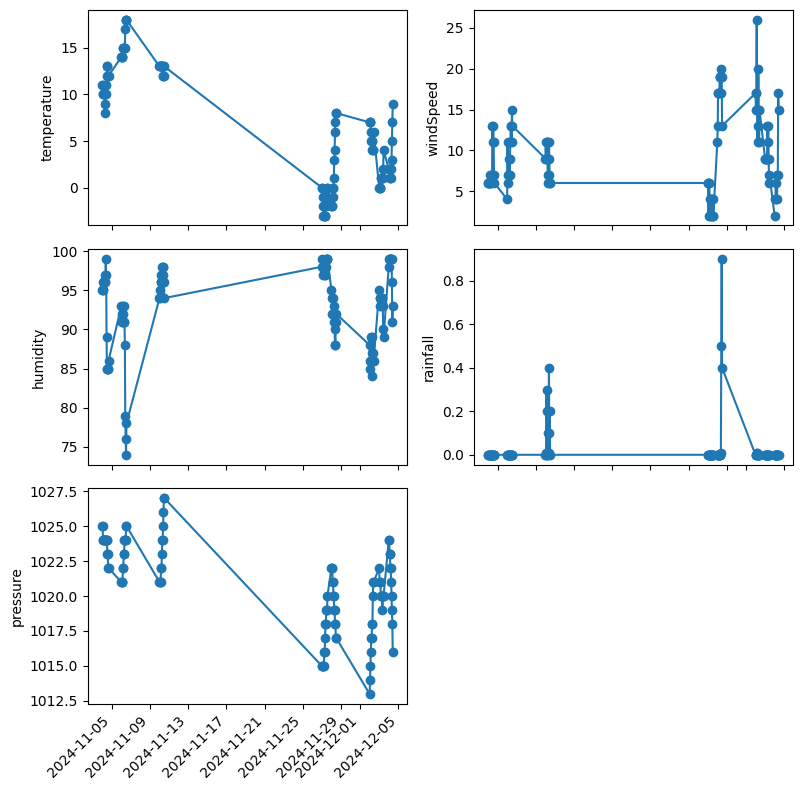

In [9]:
# We will make a plot over some of the columns of interest:
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(8, 8), sharex=True) #Defining the subplots
axes = ax.flatten() # Flattening the subplots to make it easier to loop through them
                    # Got the idea from: https://stackoverflow.com/questions/28070906/loop-over-2d-subplot-as-if-its-a-1-d

for i,c in enumerate(dcolumns): # c is the column name and i is the index for the plot location
  axes[i].plot(wdata.index, wdata[c], 'o-', label=c)
  axes[i].set_ylabel(c)  # Add title to the y-axis

# Unfortunately, the dates are barely readable. I will rotate them to make them more readable. From ChatGPT
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

axes[-1].set_visible(False) #Remove the last plot as its empty
plt.tight_layout()
plt.show()

From this plots, we can see that the temperature, wind speed, and pressure are somewhat correlated. The humidity and rainfall are not as correlated with the other variables. We can check if this correlation is somehow significant by calculating the correlation matrix. 

In [10]:
wdata[dcolumns].corr()

,temperature,windSpeed,humidity,rainfall,pressure
temperature,1.000000,0.114099,-0.440610,0.134804,0.557716
windSpeed,0.114099,1.000000,-0.605001,0.236508,-0.179829
humidity,-0.440610,-0.605001,1.000000,0.011099,-0.035204
rainfall,0.134804,0.236508,0.011099,1.000000,-0.065537
pressure,0.557716,-0.179829,-0.035204,-0.065537,1.000000


Temperature is slightly negatively correlated with humidity, and slightly positively correlated with pressure. Humidity seems to be negatively correlated with windspeed. At the time of doing this correlation matrix there was only seven days of data. A longer timeseries would help to discern wether or not this correlation are significant. 

# Project 

As part of the project for the Computer Infrastructure Course, we will automate the `weather.sh` script to run daily and push the new data to our repository. 

First, we start by creating a new directory within our repository:  
```bash
mkdir -p .github/workflows  #The -p allows to create a folder within an empty folder 
```
Within this directory, we create a new file: 
```bash 
touch weather-data.yml
``` 

Following Ian Lectures, we used GitHub Copilot and ChatGPT to modify the `.yml` script. The .yml script will allow to run the `weather.sh` script automatically and therefore download the Athenry daily weather data. The `.yml` file contains my comments indicating what are some of the most important features of this script. 

I have extended this project further by also automating the rendering of this notebook, by also defining a github workflow called `jupyter-updated.yml`. I searched online (https://stackoverflow.com/questions/63343937/how-to-use-the-github-actions-workflow-run-event; also with the help of ChatGPT) how I could automate this workflow just after the download of the data was carried, and I found out it could be done by: 

```yml
on:
  workflow_run:
    workflows:
      - Weather Data Workflow  # The exact name of your weather-data.yml workflow
    types:
      - completed  
```

I have tested that this setup works by manually dispatching the `Weather Data Workflow` and then checking that the `Update Weather Analysis Notebook` workflow was also dispatched. 

# End